<a href="https://colab.research.google.com/github/macedoti13/Airbnb-Price-Prediction/blob/main/AprendizadoSupervisonado_Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 1: KNN no dataset Wine


In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

accuracy score: 0.9661016949152542
f1 score: 0.9661383813926188


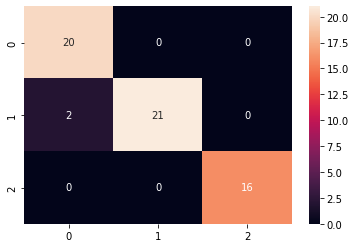

In [6]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsClassifier())
])

params = {
    'model__n_neighbors':[1,3,5,7,9,11]
}

model = GridSearchCV(pipeline, param_grid=params, cv=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average="weighted")}')

K: 1


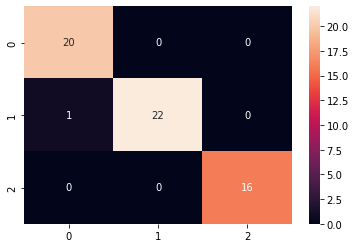

accuracy score: 0.9830508474576272
f1 score: 0.9830692205227136
K: 3


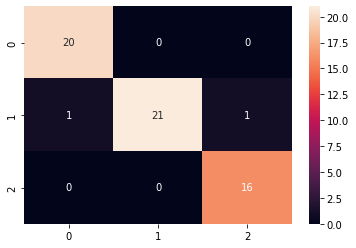

accuracy score: 0.9661016949152542
f1 score: 0.9657947812143761
K: 5


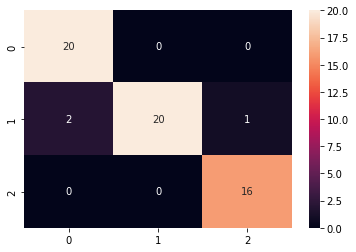

accuracy score: 0.9491525423728814
f1 score: 0.948442701694574
K: 7


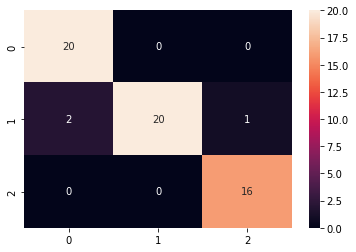

accuracy score: 0.9491525423728814
f1 score: 0.948442701694574
K: 9


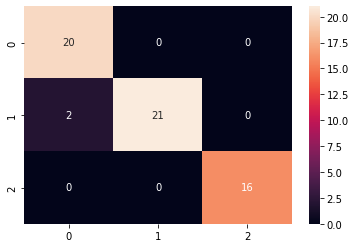

accuracy score: 0.9661016949152542
f1 score: 0.9661383813926188
K: 11


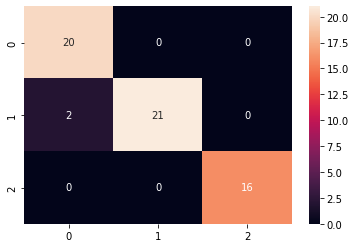

accuracy score: 0.9661016949152542
f1 score: 0.9661383813926188


In [7]:
ks = [1, 3, 5, 7, 9, 11]

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train, y_train)
x_test_scaled = scaler.transform(x_test)

for k in ks:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)
  print(f'K: {k}')
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True)
  plt.show()
  print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
  print(f'f1 score: {f1_score(y_test, y_pred, average="weighted")}')

